# 9. Neural Networks with Sphere example

In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 9.1 Generate Data

In [3]:
def make_datasets(size, dim) :
    x = torch.randn(size, dim)
    y = torch.randn(size, dim)

    x = x / x.norm(dim=1).view(size, 1)
    y = 4 * y / y.norm(dim=1).view(size, 1)
    
    label_x = torch.ones(size)
    label_y = torch.zeros(size)

    data = torch.cat([x, y])
    label = torch.cat([label_x, label_y])
    
    return TensorDataset(data, label)

In [4]:
train_data = make_datasets(500, 2)
test_data = make_datasets(100, 2)

batch_size = 100

train_loader = DataLoader(batch_size=batch_size, dataset=train_data, shuffle=True)
test_loader = DataLoader(batch_size=batch_size, dataset=test_data, shuffle=False)

# dataset (Dataset) – dataset from which to load the data.
# batch_size (int, optional) – how many samples per batch to load (default: 1).
# shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).

In [5]:
X = train_data.tensors[0]
Y = train_data.tensors[1]

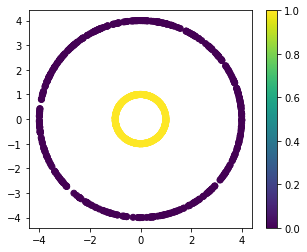

In [6]:
fig = plt.figure(figsize = (5, 4))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.colorbar()
plt.show()

## 9.2 Define Model

In [7]:
model = nn.Sequential(
    nn.Linear(2, 1000),
    nn.ReLU(),
    nn.Linear(1000, 1000),
    nn.ReLU(),
    nn.Linear(1000, 1),
    nn.Sigmoid()
)

## 9.3 Train Model

In [8]:
loss = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [9]:
num_epochs = 10

In [10]:
model.train()
    
for i, (batch_data, batch_labels) in enumerate(train_loader):

    X = batch_data
    Y = batch_labels

    pre = model(X)
    cost = loss(pre.squeeze(), Y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('lter [%d/%d], Loss: %.4f'%(i+1, len(train_loader), cost.item()))
    
print("Learning Finished!")

lter [1/10], Loss: 0.8330
lter [2/10], Loss: 0.8971
lter [3/10], Loss: 0.4460
lter [4/10], Loss: 0.4581
lter [5/10], Loss: 0.3969
lter [6/10], Loss: 0.3683
lter [7/10], Loss: 0.2969
lter [8/10], Loss: 0.3055
lter [9/10], Loss: 0.2212
lter [10/10], Loss: 0.2560
Learning Finished!


## 9.3 Test Model

In [11]:
correct = 0
total = 0

for data, labels in test_loader:
    
    outputs = model(data)
    
    predicted = outputs.squeeze().data > 0.5
    total += data.shape[0]
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))
print('Misclassified : %d %%' % (total - correct))

Accuracy of test images: 100.000000 %
Misclassified : 0 %


## 9.4 Decision Boundary

In [12]:
grid_size = 500
x = torch.linspace(-5, 5, grid_size)
y = torch.linspace(-5, 5, grid_size)
xv, yv = torch.meshgrid(x, y)

In [13]:
xv.shape, yv.shape

(torch.Size([500, 500]), torch.Size([500, 500]))

In [14]:
xv = xv.reshape(-1, 1)
yv = yv.reshape(-1, 1)

In [15]:
torch.cat([xv, yv], dim=1)

tensor([[-5.0000, -5.0000],
        [-5.0000, -4.9800],
        [-5.0000, -4.9599],
        ...,
        [ 5.0000,  4.9599],
        [ 5.0000,  4.9800],
        [ 5.0000,  5.0000]])

In [16]:
z = model(torch.cat([xv, yv], dim=1)) > 0.5

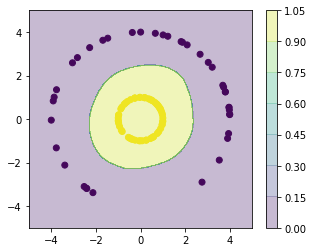

In [17]:
x = xv.data.numpy().reshape(grid_size, grid_size)
y = yv.data.numpy().reshape(grid_size, grid_size)
z = z.data.numpy().reshape(grid_size, grid_size)

fig = plt.figure(figsize = (5, 4))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.contourf(x, y, z, alpha=0.3)
plt.colorbar()
plt.show()

#### decision boundary 표현